## Import packages

In [34]:
import numpy as np
from PIL import Image
from numpy import histogram as hist  # call hist, otherwise np.histogram
import matplotlib.pyplot as plt

import histogram_module
import dist_module
import match_module
import rpc_module

import importlib
importlib.reload(histogram_module)
importlib.reload(dist_module)
importlib.reload(match_module)
importlib.reload(rpc_module)

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray


## Gray-value histograms (Question 2.a)


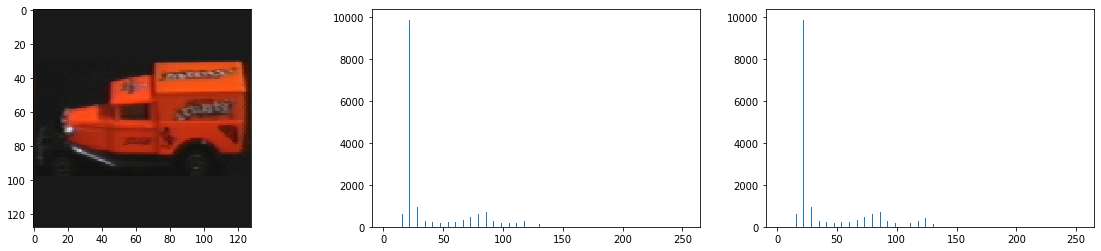

In [36]:
img_color = np.array(Image.open('./model/obj100__0.png'))
img_gray = rgb2gray(img_color.astype('double'))
plt.figure(1, figsize=(20,4))
plt.subplot(1,3,1)
plt.imshow(img_color)

plt.subplot(1,3,2)
num_bins_gray = 40
hist_gray1, bin_gray1 = hist(img_gray.reshape(img_gray.size), num_bins_gray,(0,255))
plt.bar((bin_gray1[0:-1] + bin_gray1[1:])/2, hist_gray1)

plt.subplot(1,3,3)
hist_gray2, bin_gray2 = histogram_module.normalized_hist(img_gray, num_bins_gray)
plt.bar((bin_gray2[0:-1] + bin_gray2[1:])/2, hist_gray2)
plt.show()

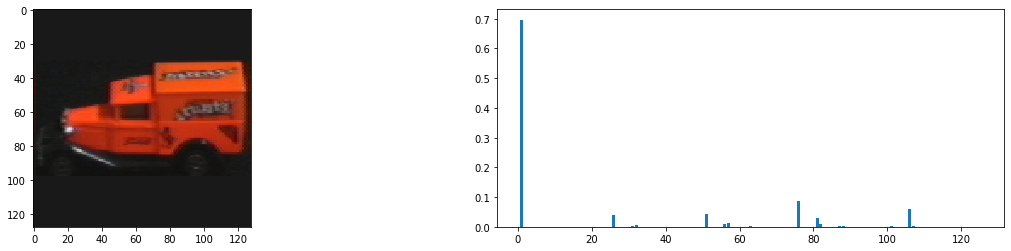

In [41]:
#Compose and test RGB histograms (histogram_module.rgb_hist)
plt.figure(2, figsize=(20,4))
plt.subplot(1,2,1)
plt.imshow(img_color)

num_bins_color = 5
plt.subplot(1,2,2)
hist_rgb = histogram_module.rgb_hist(img_color.astype('double'), num_bins_color)
plt.bar(np.array(range(1,hist_rgb.size+1)),hist_rgb)
plt.show()


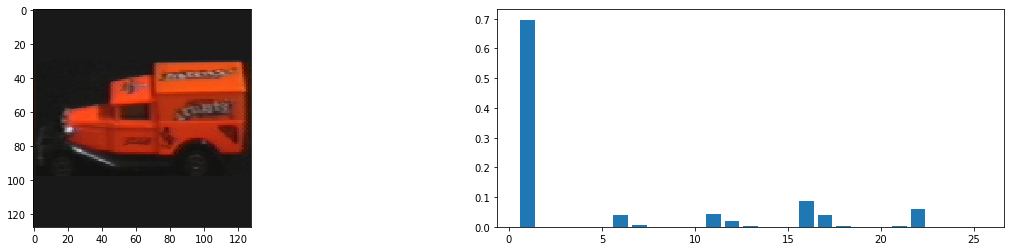

In [42]:
#Compose and test RG histograms (histogram_module.rg_hist)
plt.figure(3, figsize=(20,4))
plt.subplot(1,2,1)
plt.imshow(img_color)

num_bins_color = 5
plt.subplot(1,2,2)
hist_rg = histogram_module.rg_hist(img_color.astype('double'), num_bins_color)
plt.bar(np.array(range(1,hist_rg.size+1)),hist_rg)
plt.show()

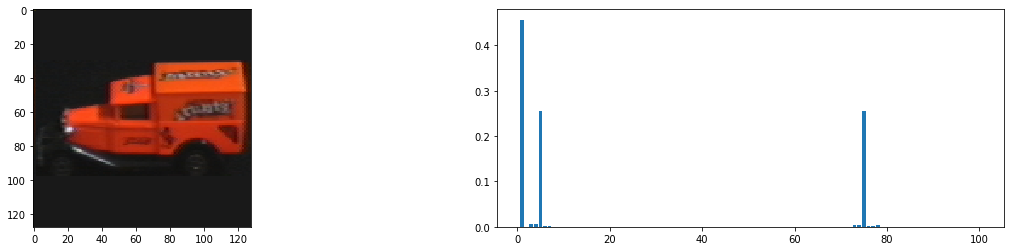

In [44]:
#Compose and test dxdy histograms (histogram_module.dxdy_hist)
plt.figure(5, figsize=(20,4))
plt.subplot(1,2,1)
plt.imshow(img_color)

num_bins_dxdy = 10
plt.subplot(1,2,2)
hist_dxdy = histogram_module.dxdy_hist(img_gray, num_bins_dxdy)
plt.bar(np.array(range(1,hist_dxdy.size+1)),hist_dxdy)
plt.show()

In [45]:
hist_dxdy

array([0.45667614, 0.        , 0.00710227, 0.00568182, 0.25568182,
       0.00142045, 0.00071023, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00426136, 0.00426136, 0.25568